## Problem Statement 
- Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. 
### The objective is to predict the value of prices of the house using the given features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
print(boston_dataset.keys())

   - data: contains the information for various houses
   - target: prices of the house
   - feature_names: names of the features
   - DESCR: describes the dataset

In [ ]:
boston_dataset.DESCR

- The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

## Loading data into Data frame

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(3)

- We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [ ]:
boston['MEDV'] = boston_dataset.target
boston["MEDV"].describe()

## Data preprocessing
-  We count the number of missing values for each feature using isnull()

In [ ]:
boston.isnull().sum() 

## Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model.
- Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

- We see that the values of MEDV are distributed normally with few outliers

### The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(20,20))
cor = boston.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Insights: 

    -  To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
    - An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

#### Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

In [ ]:
#Correlation with output variable
cor_target = abs(cor['MEDV'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO' ]
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('MEDV')

# FE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [ ]:
X=boston
Y = boston['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

## Insights
   - The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
   - The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Preparing the data for training the model

- We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Splitting the data into training and testing sets

- Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. 
- To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

### Training and testing the model

- We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
print(lin_model.intercept_)

In [ ]:
print(lin_model.coef_) 

### Model evaluation

We will evaluate our model using RMSE and R2-score

In [ ]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

## Comparing Actual and Predicted value 

In [ ]:
r = pd.DataFrame({'Actual': Y_test, 'Predicted': y_test_predict})  
r

### Conclusion

- There are 63% of the total cases prediction will be correct.
- We can use cross validation for Model improvement 

## Performance Improvement by Cross validation

In [ ]:
from sklearn.model_selection import train_test_split  
train, validation = train_test_split(boston, test_size=0.50, random_state = 5) 

In [ ]:
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=5) 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

In [ ]:
print(reg.intercept_,reg.coef_)

In [ ]:
y_pred = reg.predict(X_v)  
#y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_v, y_pred)
print(r2)

In [ ]:
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_v, y_pred)))

## Model Correction



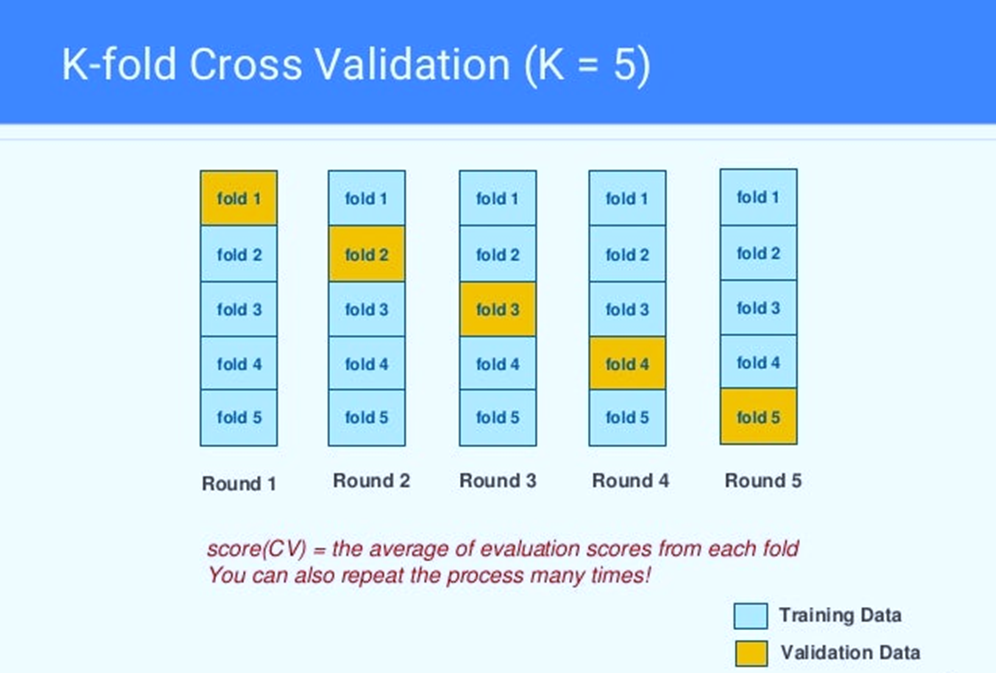

In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=7)
scores    

In [ ]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores